## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
hotelbookings=pd.read_csv("/content/drive/MyDrive/Copy of Hotel Bookings.csv")
hotelbookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotelbookings.shape

(119390, 32)

In [ ]:
hotelbookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stay,total_people
count,87213.000000,87213.000000,87213.000000,87213.000000,87213.000000,87213.000000,87213.000000,87213.000000,87213.000000,87213.000000,...,87213.000000,87213.000000,87213.000000,87213.000000,87213.000000,87213.000000,87213.000000,87213.000000,87213.000000,87213.000000
mean,0.275200,79.907353,2016.210381,26.833935,15.815142,1.004690,2.623840,1.879341,0.138924,0.010847,...,0.184044,0.268400,81.104789,10.987089,0.694449,106.465204,0.084139,0.699036,3.628530,2.029113
std,0.446617,85.908032,0.686103,13.669181,8.835734,1.027145,2.039124,0.621782,0.456305,0.113715,...,1.733179,0.710514,109.982340,53.961708,9.013486,51.883760,0.279122,0.832083,2.741861,0.790218
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,0.000000,0.000000,72.250000,0.000000,0.000000,2.000000,2.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,0.000000,0.000000,98.250000,0.000000,0.000000,3.000000,2.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,240.000000,0.000000,0.000000,134.100000,0.000000,1.000000,5.000000,2.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,72.000000,18.000000,535.000000,543.000000,259.000000,510.000000,3.000000,5.000000,69.000000,55.000000


In [ ]:
hotelbookings.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

#**Data** **Cleaning**

### a) Checking for data type

In [ ]:
hotelbookings.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
hotelbookings.info

<bound method DataFrame.info of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27  

### b) Handling missing values

In [ ]:
hotelbookings.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [ ]:
hotelbookings[['company','agent']] = hotelbookings[['company','agent']].fillna(0)
hotelbookings['children'].unique()
hotelbookings['children'].fillna(hotelbookings['children'].mean(), inplace = True)
hotelbookings['country'].fillna('others', inplace = True)
hotelbookings.isnull().sum().sort_values(ascending = False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

In [ ]:
hotelbookings[hotelbookings['adults']+hotelbookings['babies']+hotelbookings['children'] == 0].shape

(180, 32)

In [ ]:
hotelbookings.drop(hotelbookings[hotelbookings['adults']+hotelbookings['babies']+hotelbookings['children'] == 0].index, inplace = True)

### c) Converting columns to appropriate datatypes

In [ ]:
hotelbookings[['children', 'company', 'agent']] = hotelbookings[['children', 'company', 'agent']].astype('int64')

In [ ]:
hotelbookings['reservation_status_date'] = pd.to_datetime(hotelbookings['reservation_status_date'], format = '%Y-%m-%d')

### d) Check for duplicate value rows

In [ ]:
hotelbookings.duplicated().value_counts()

False    87230
True     31980
dtype: int64

In [ ]:
hotelbookings.drop_duplicates(inplace=True) 

In [ ]:
hotelbookings.shape

(87230, 32)

### e) Addings important columns

In [ ]:
hotelbookings['total_stay'] = hotelbookings['stays_in_weekend_nights']+hotelbookings['stays_in_week_nights']
hotelbookings['total_people'] = hotelbookings['adults']+hotelbookings['children']+hotelbookings['babies']


### g) Check for Outliers

### 1. Removing Outlier from adr data

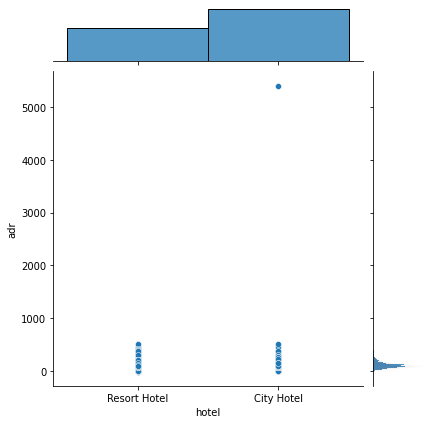

In [ ]:
sns.jointplot(x='hotel', y='adr', data= hotelbookings)

We have found an outlier in adr data,hence we will try to remove it inorder to do a better data analysis process

In [ ]:
hotelbookings.drop(hotelbookings[hotelbookings['adr'] > 5000].index, inplace = True) 

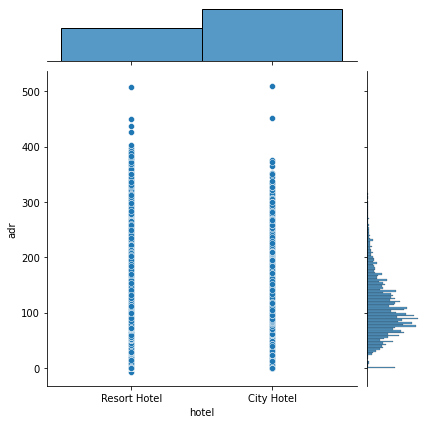

In [ ]:
sns.jointplot(x='hotel', y='adr', data= hotelbookings)

### 2. Removing Outlier from lead time data

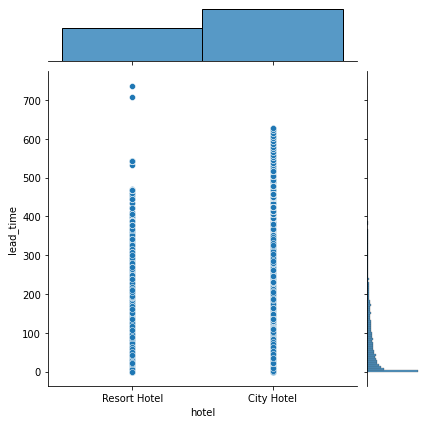

In [ ]:
fun sns.jointplot(x='hotel', y='lead_time', data= hotelbookings)

We have found some outliers above 650 range in Resort Hotel ,we will drop them for better data analysis

In [ ]:
hotelbookings.drop(hotelbookings[hotelbookings['lead_time']> 650].index,inplace=True)   

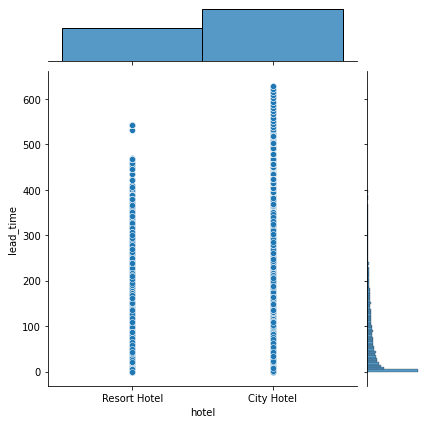

In [ ]:
sns.jointplot(x='hotel', y='lead_time', data= hotelbookings)

### 3. Removing Outlier from days in waiting list data

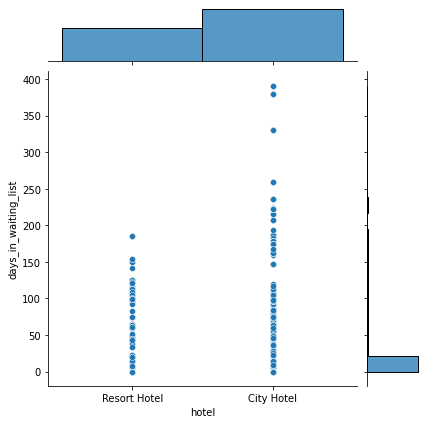

In [ ]:
sns.jointplot(x='hotel', y='days_in_waiting_list', data= hotelbookings)

We have found some outliers above 300 range in City Hotel ,we will drop them for better data analysis

In [ ]:
hotelbookings.drop(hotelbookings[hotelbookings['days_in_waiting_list']> 300].index,inplace=True)  

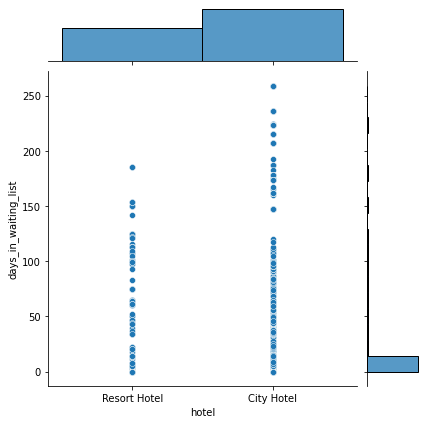

In [ ]:
sns.jointplot(x='hotel', y='days_in_waiting_list', data= hotelbookings)

### 4. Removing Outlier from Car parking space  data

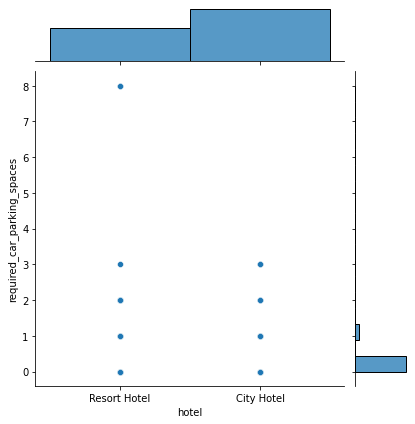

In [ ]:
sns.jointplot(x='hotel', y='required_car_parking_spaces', data= hotelbookings)

In [ ]:
hotelbookings.drop(hotelbookings[hotelbookings['required_car_parking_spaces']> 5].index,inplace=True)

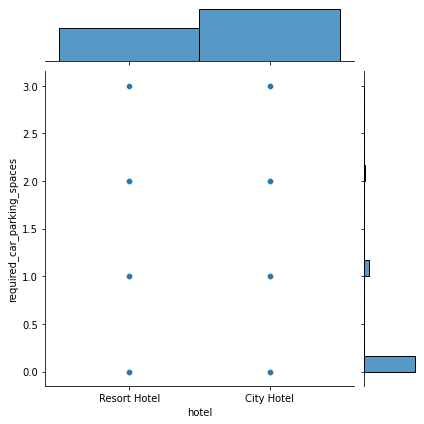

In [ ]:
sns.jointplot(x='hotel', y='required_car_parking_spaces', data= hotelbookings)

In [ ]:
hotelbookings.shape

(87213, 34)

#1) Most used distribution channel

In [ ]:
hotelbookings.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
hotelbookings.distribution_channel.value_counts()

TA/TO        69015
Direct       12952
Corporate     5060
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


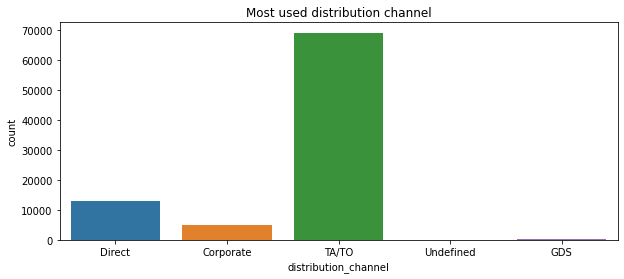

In [ ]:
plt.rcParams['figure.figsize'] = (10,4)
plt.title('Most used distribution channel')
sns.countplot(hotelbookings.distribution_channel)

Most used distribution channel is TA/TO.

#2) Market segments used by the guests

In [ ]:
Marketsegments = hotelbookings.market_segment.unique()
print(Marketsegments)

['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']


In [ ]:
market = hotelbookings['market_segment'].value_counts().reset_index()
market.columns=['Marketsegments','Number of guests']
market['Marketsegments'] = pd.Categorical(market['Marketsegments'], categories=Marketsegments, ordered=True)
market.sort_values('Marketsegments').reset_index()

,index,Marketsegments,Number of guests
0,2,Direct,11776
1,4,Corporate,4200
2,0,Online TA,51553
3,1,Offline TA/TO,13854
4,5,Complementary,692
5,3,Groups,4910
6,7,Undefined,2
7,6,Aviation,226


In [ ]:
d_resort = hotelbookings[(hotelbookings['hotel'] == 'Resort Hotel') & (hotelbookings['is_canceled'] == 0)]
d_city = hotelbookings[(hotelbookings['hotel'] == 'City Hotel') & (hotelbookings['is_canceled'] == 0)]

resorthotel = d_resort.groupby(['market_segment'])['adr'].mean().reset_index()
cityhotel= d_city.groupby(['market_segment'])['adr'].mean().reset_index()

finalhotel = resorthotel.merge(cityhotel, on = 'market_segment')
finalhotel.columns = ['Marketsegment', 'resort_price', 'city_price']
finalhotel

,Marketsegment,resort_price,city_price
0,Complementary,4.390127,2.875501
1,Corporate,49.569977,82.079575
2,Direct,110.198755,120.829624
3,Groups,64.170640,86.097064
4,Offline TA/TO,74.264852,85.982270
5,Online TA,107.461988,118.463338


In [ ]:
resortguest = d_resort['market_segment'].value_counts().reset_index()
resortguest.columns=['Marketsegment','no of guests']
resortguest

cityguest = d_city['market_segment'].value_counts().reset_index()
cityguest.columns=['Marketsegment','no of guests']
cityguest

finalguest=resortguest.merge(cityguest, on = 'Marketsegment')
finalguest.columns=['Marketsegment','no of guests in resort','no of guest in city hotel']
finalguest

,Marketsegment,no of guests in resort,no of guest in city hotel
0,Online TA,10997,22314
1,Offline TA/TO,5816,5982
2,Direct,5413,4626
3,Groups,1858,1727
4,Corporate,1736,1955
5,Complementary,158,449


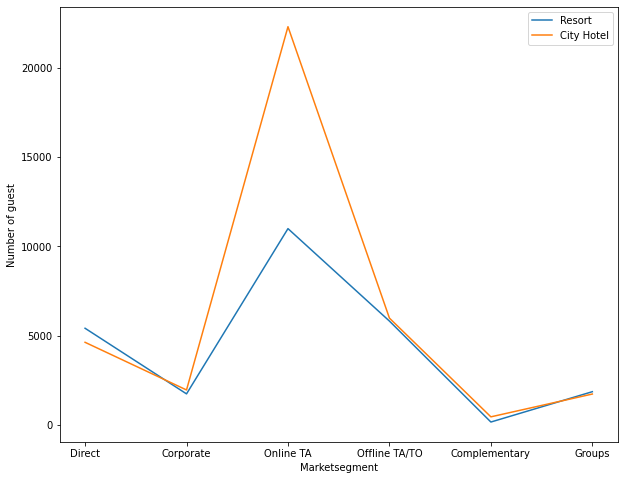

In [ ]:
Marketsegments = hotelbookings.market_segment.unique()
finalguest['Marketsegment'] = pd.Categorical(finalguest['Marketsegment'], categories=Marketsegments, ordered=True)
finalguest = finalguest.sort_values('Marketsegment').reset_index()


sns.lineplot(data=finalguest, x='Marketsegment', y='no of guests in resort')
sns.lineplot(data=finalguest, x='Marketsegment', y='no of guest in city hotel')

plt.legend(['Resort','City Hotel'])
plt.ylabel('Number of guest')
fig = plt.gcf()
fig.set_size_inches(10,8)

Most used Market segment for both the hotels is Online TA.

#3) Meals preferred

In [ ]:
hotelbookings.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
hotelbookings.meal.value_counts()

BB           67895
SC            9391
HB            9075
Undefined      492
FB             360
Name: meal, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


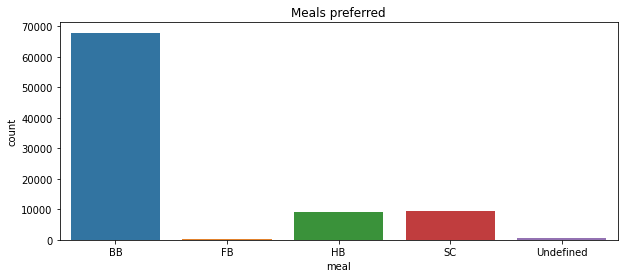

In [ ]:
plt.rcParams['figure.figsize'] = (10,4)
plt.title('Meals preferred')
sns.countplot(hotelbookings.meal)

#4) Factor affecting Cancellation rate

#Distribution Channel with highest cancellation

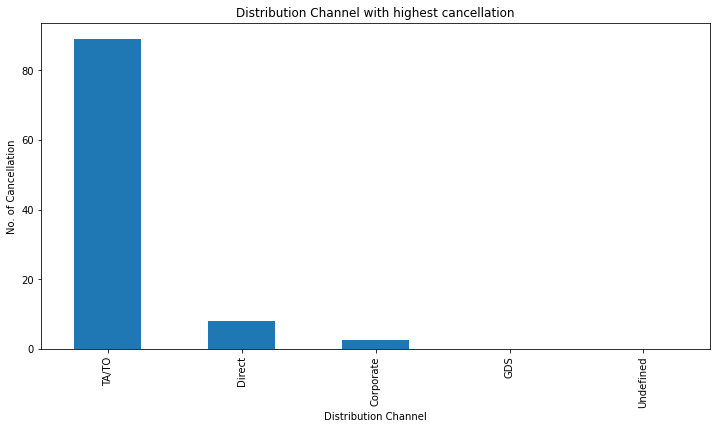

In [ ]:
cond = hotelbookings[hotelbookings['is_canceled']==1]
channel =  (cond['distribution_channel'].value_counts()/cond['distribution_channel'].size)*100
plt.rcParams['figure.figsize'] = (12,6)
channel.plot(kind = 'bar')
plt.title('Distribution Channel with highest cancellation')
plt.ylabel('No. of Cancellation')
plt.xlabel('Distribution Channel')
plt.show()

##a) Waiting time(days)

In [ ]:
waiting_list= hotelbookings[hotelbookings['days_in_waiting_list'] !=0]  # Selecting bookings with non zero waiting time

In [ ]:
waiting_list.shape

(842, 34)

In [ ]:
cancellation = (waiting_list.groupby('is_canceled')['days_in_waiting_list'].count()/ waiting_list['days_in_waiting_list'].size)*100
cancellation

is_canceled
0    65.914489
1    34.085511
Name: days_in_waiting_list, dtype: float64

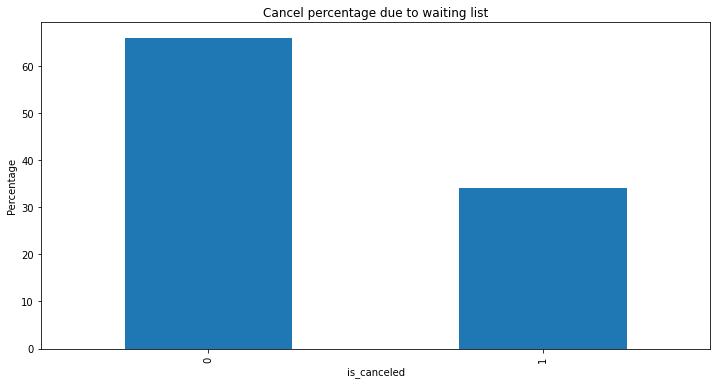

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)
cancellation.plot(kind = 'bar')
plt.title('Cancel percentage due to waiting list')
plt.ylabel('Percentage')
plt.xlabel('is_canceled')
plt.show()

### **Result**
The above bar plot tells you that the percentage of bookings canceled due to longer waiting time is compartively low. Even if there is waiting time for booking , around 65% of booking not canceled,therefore we can conclude that waiting period has no effect on cancellation of bookings

#b) Lead Time


In [ ]:
cancellation1 = (hotelbookings.groupby('is_canceled')['lead_time'].count()/hotelbookings['lead_time'].size)*100
cancellation1

is_canceled
0    72.48002
1    27.51998
Name: lead_time, dtype: float64

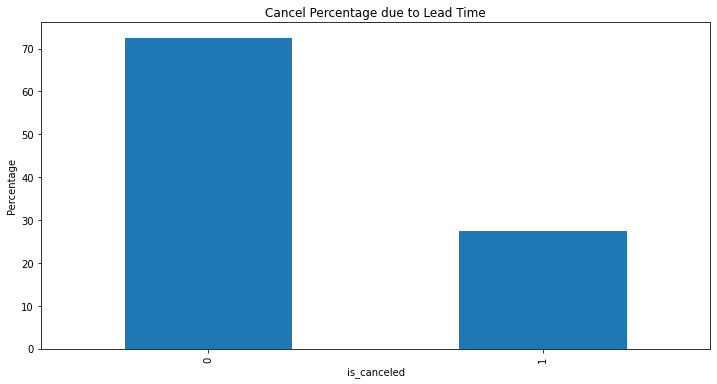

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)
cancellation1.plot(kind = 'bar')
plt.title('Cancel Percentage due to Lead Time')
plt.ylabel('Percentage')
plt.xlabel('is_canceled')
plt.show()

**Result**
The above bar plot tells you that the percentage of bookings canceled due to lead time is compartively very low. Nearly 72% of booking not canceled,therefore we can conclude that Lead Time has no effect on cancellation of bookings

## c) Whether not getting allotted the same room type as demanded is the cause of cancellation fo bookings

In [ ]:
def room(x):
  if x['assigned_room_type'] != x['reserved_room_type']:
    return 1
  else:
    return 0

In [ ]:
hotelbookings['allotted_same_room'] = hotelbookings.apply(lambda x : room(x) ,axis=1)

In [ ]:
room = (hotelbookings.groupby('is_canceled')['allotted_same_room'].sum()/hotelbookings['is_canceled'].size)*100
room

is_canceled
0    14.183665
1     0.705170
Name: allotted_same_room, dtype: float64

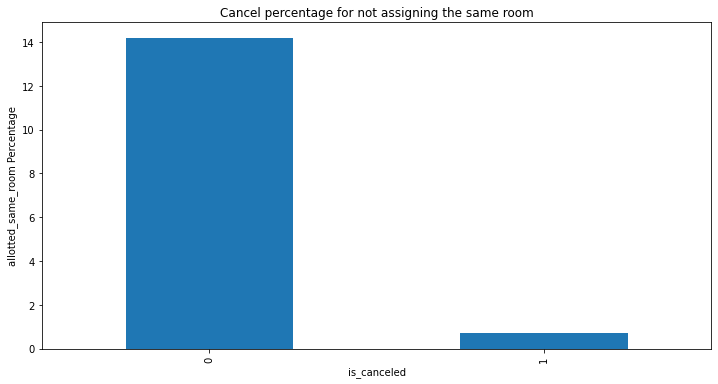

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)
room.plot(kind = 'bar')
plt.title('Cancel percentage for not assigning the same room')
plt.ylabel('allotted_same_room Percentage')
plt.xlabel('is_canceled')
plt.show()

**Result**
The above bar plot tells you that the percentage of bookings canceled due to not assigning same room is compartively very low. There were no significant number of booking  canceled due to not allocating the same room . Therefore we can conclude that not assigning the same room has no effect on cancellation of bookings

#d) Car parking space

In [ ]:
new_hotelbookings1 = hotelbookings[hotelbookings['is_canceled'] == 1]            #segregation of actual canceled data from is_canceled column
new_hotelbookings1['is_canceled'].value_counts()

1    24001
Name: is_canceled, dtype: int64

Text(0.5, 1.0, 'The number of bookings vs car parking space available')

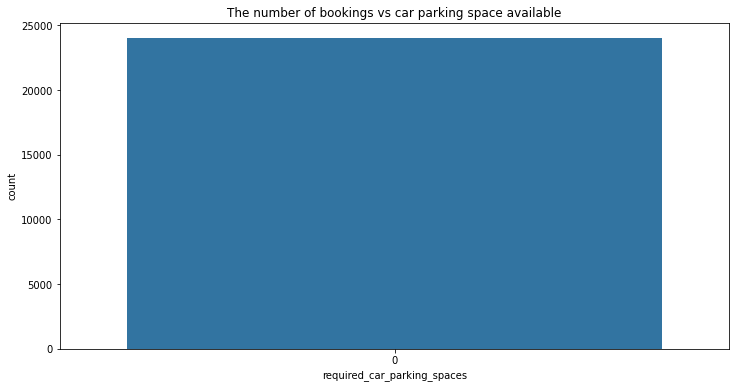

In [ ]:
sns.countplot(x='required_car_parking_spaces',data = new_hotelbookings1)
plt.title('The number of bookings vs car parking space available')

**Result** 
When we have gone through analysis of actual canceled data analysis(new_df1),we find that the required_car_space column name has only value 0 in its entire rows.All the canceled booking has assigned zero parking space,not a single car parking space alloted in the booking. Hence we can conclude from this analysis that one prime reason behind cancellation will be due to no car parking space.

***Conclusion***
1.We can conclude from our above analysis that the one prime reason behind booking cancellation is due to no availability of car parking space for the canceled booking.

2.The other parameters like lead time and days in waiting list have no significant impact on the cancellation rate.

3.We have also see from our analysis that the booking change from assigned room to reserved room parameter not had any influence on cancellation of bookings.

#5) Factors Governing Booking

#a) Deposit type

In [ ]:
new_hotelbooking = hotelbookings[hotelbookings['is_canceled'] == 0]                      # segregation of actual guest who doesn't canceled their bookings from is_canceled column
new_hotelbooking.shape

(63212, 35)

In [ ]:
factor1 = (new_hotelbooking['deposit_type'].value_counts() /new_hotelbooking['deposit_type'].size)*100

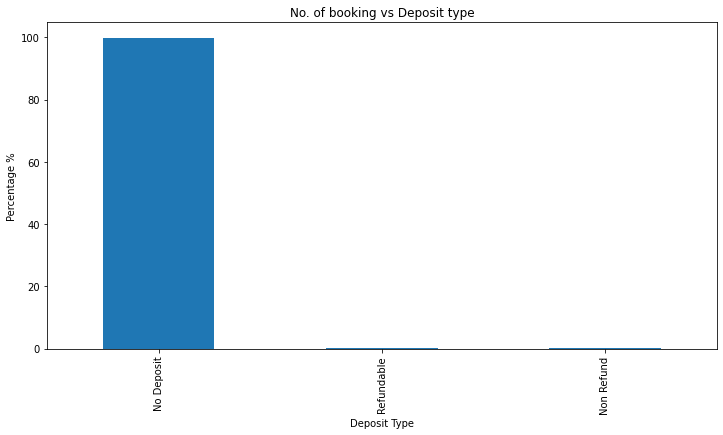

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)
factor1.plot(kind = 'bar')
plt.title('No. of booking vs Deposit type')
plt.ylabel('Percentage %')
plt.xlabel('Deposit Type')
plt.show()

 **Result**
The most number of guests while booking the room prefer the deposit type with No Deposit option(Above 90%). Hence we can conclude from the the above barplot that inorder to increase the number of booking ,the hotel should plan to provide No 
Deposit type option to their customers.

#b) Room Type Assigned

In [ ]:
factor2 = new_hotelbooking.groupby(['assigned_room_type'])['adr'].mean()

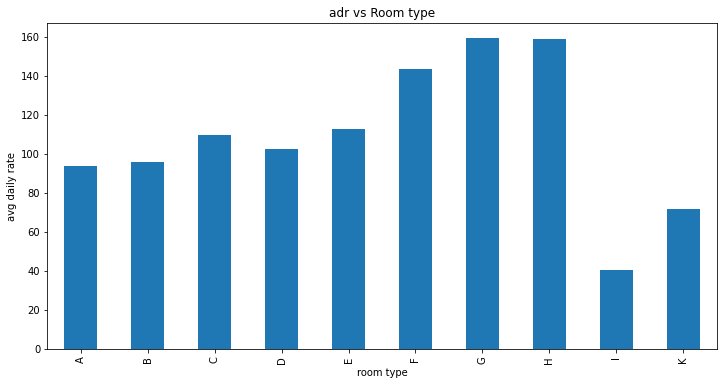

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)
factor2.plot(kind = 'bar')
plt.title('adr vs Room type')
plt.ylabel('avg daily rate')
plt.xlabel('room type')
plt.show()

**Result**
The hotel can gain most of its revenue from Room type-G & H,since these two room type have the highest average daily rate. Inorder to increase the sale in these two room type ,the hotel should provide the guest with good deals.

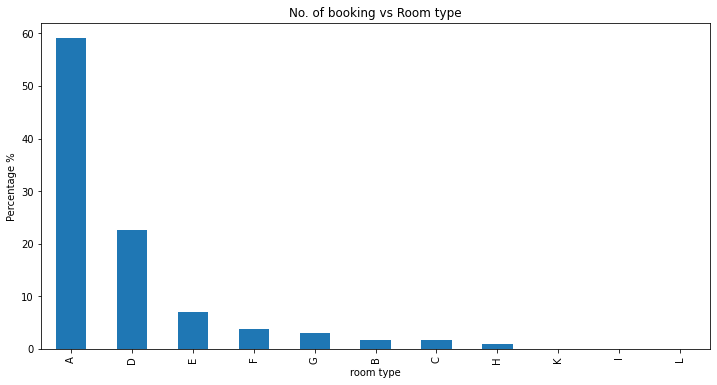

In [ ]:
x = (new_hotelbookings['assigned_room_type'].value_counts()/new_hotelbookings['assigned_room_type'].size)*100
plt.rcParams['figure.figsize'] = (12,6)
x.plot(kind = 'bar')
plt.title('No. of booking vs Room type')
plt.ylabel('Percentage %')
plt.xlabel('room type')
plt.show()

**Result**
The above bar plot conveys that Room type A has the highest number of bookings compared to the other room type,secondly in demand is room type D.Hence inorder to increase their sales the hotels should provide the guest with these room type A and D always vacant and available.

#c) Customer Type

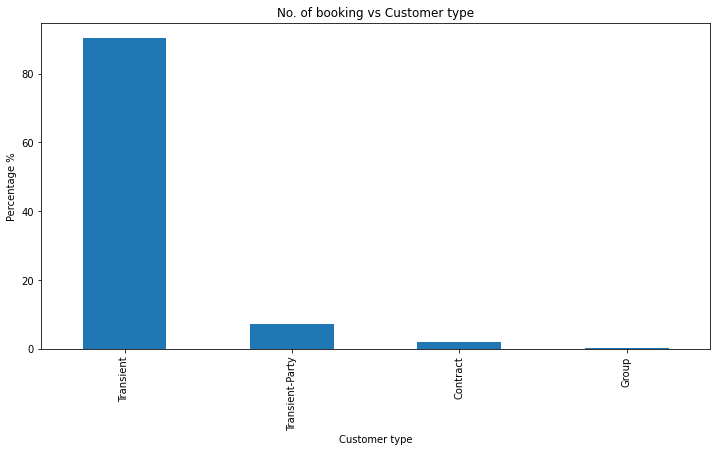

In [ ]:
factor3 = (new_hotelbookings['customer_type'].value_counts()/new_hotelbookings['customer_type'].size)*100
plt.rcParams['figure.figsize'] = (12,6)
factor3.plot(kind = 'bar')
plt.title('No. of booking vs Customer type')
plt.ylabel('Percentage %')
plt.xlabel('Customer type')
plt.show()

### **Result**
Another important factor which governs the booking is the Customer Type.The above plot clearly depicts more than 75% of booking has been carried out by Transient Customer Type and  less than 5% of booking has been done by group customer type.

#d) Hotel Type

In [ ]:
factor4 = (new_hotelbookings['hotel'].value_counts()/new_hotelbookings['hotel'].size)*100

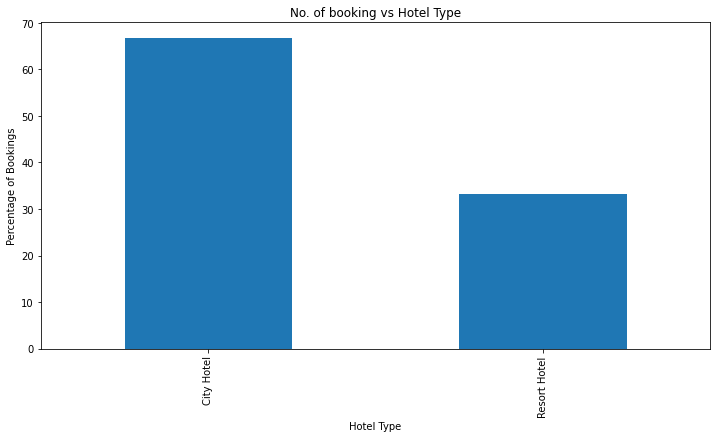

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)
factor4.plot(kind = 'bar')
plt.title('No. of booking vs Hotel Type')
plt.ylabel('Percentage of Bookings')
plt.xlabel('Hotel Type')
plt.show()

***Result***
Another primary factor which governing the booking is the hotel preference by the customer. The above barplot depicts nearly 60% of guests prefer City Hotel and only 40% of guest prefer Resort Hotel

#e) Total number of days stays

In [ ]:
new_hotelbookings['total_stay'] = new_hotelbookings['stays_in_weekend_nights'] + new_hotelbookings['stays_in_week_nights']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
factor5 = (new_hotelbookings['total_stay'].value_counts()[:15]/new_hotelbookings['total_stay'].size)*100

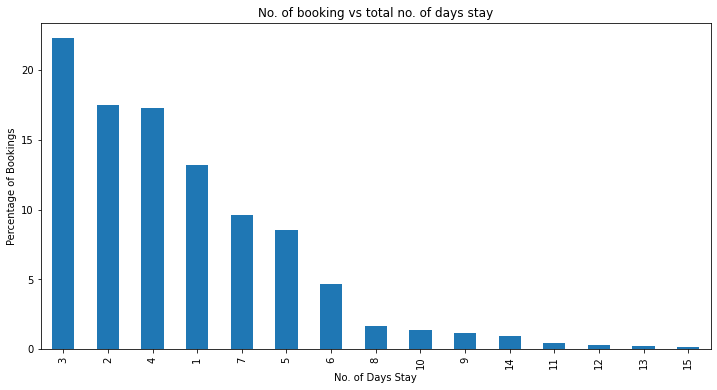

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)
factor5.plot(kind = 'bar')
plt.title('No. of booking vs total no. of days stay')
plt.ylabel('Percentage of Bookings')
plt.xlabel('No. of Days Stay')
plt.show()

***Result***
The number of days stay prefered by most number of customers is 1 day with nearly 25% ,secondly the prefered no. of days stay is 3 days.

#f)Total Number of Guest

In [ ]:
new_hotelbookings['total_no_guest'] = new_hotelbookings['adults']+new_hotelbookings['children']+new_hotelbookings['babies']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
factor6 = (new_hotelbookings['total_no_guest'].value_counts()/new_hotelbookings['total_no_guest'].size)*100

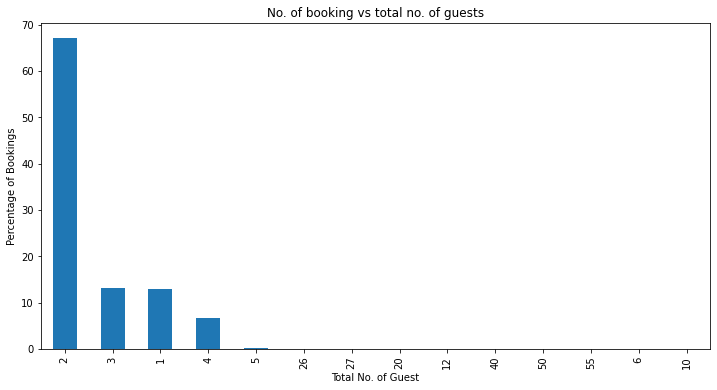

In [ ]:
plt.rcParams['figure.figsize'] = (12,6)
factor6.plot(kind = 'bar')
plt.title('No. of booking vs total no. of guests')
plt.ylabel('Percentage of Bookings')
plt.xlabel('Total No. of Guest')
plt.show()

***Result***
The total number of guest is another prime factor governing the bookings. We can conclude from the above barplot that most number of bookings are done by couples.Hence providing good deals for couples can increase the number of bookings

# 6) What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests

#a)Special Request According to Adults

Text(0.5, 1.0, 'Total special request vs adults')

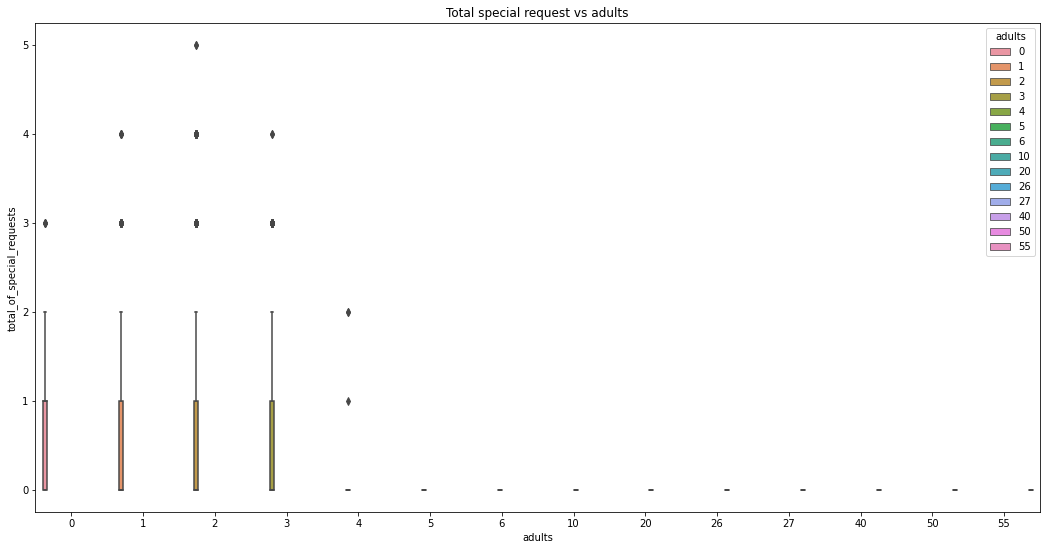

In [ ]:
sns.boxplot(x = 'adults' , y= 'total_of_special_requests' ,hue = 'adults', data = new_hotelbookings)
fig = plt.gcf()
fig.set_size_inches(18,9)
plt.title('Total special request vs adults')

***Result***
The above boxplot depicts that the most number of special request is made when the number of adults are 3. Hence the hotel can predict the special request based on the above plot easily and can take necessary steps to curb the number of special request

#b)Special Request According to Market Segmentation

Text(0.5, 1.0, 'Total special request vs Market Segmentation')

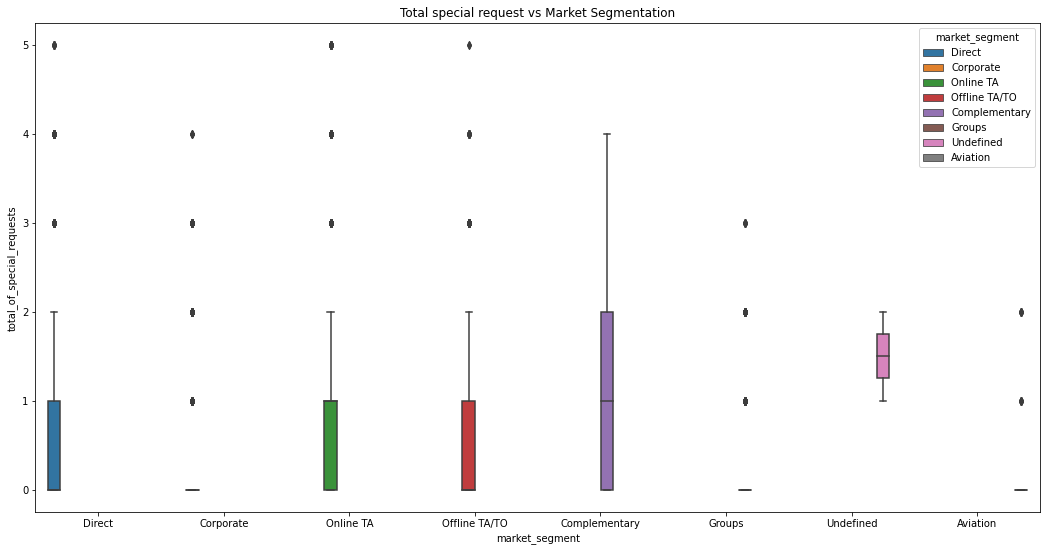

In [ ]:
sns.boxplot(x ='market_segment' , y='total_of_special_requests', hue='market_segment',data =hotelbookings)
fig = plt.gcf()
fig.set_size_inches(18,9)
plt.title('Total special request vs Market Segmentation')

***Result***
The above boxplot depicts that the most number of special request made by various market segment. The most number of special request will be asked from Complementary market segment. Hence the hotel can predict the special request based on the above plot easily and can take adequate steps to reduce the number of special request

#c)Special Request According to Kids

In [ ]:
new_hotelbookings['kids'] = new_hotelbookings['children'] + new_hotelbookings['babies']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Total special request vs kids')

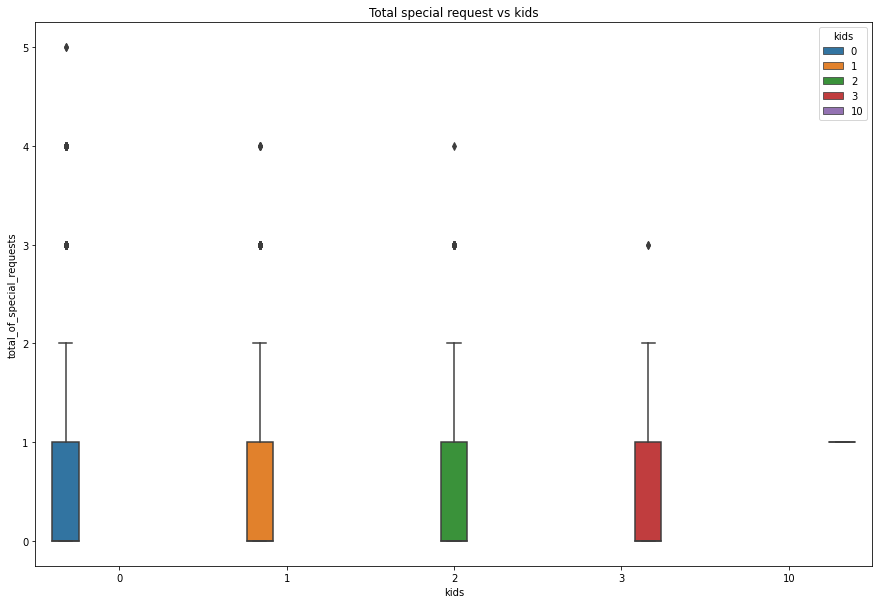

In [ ]:
sns.boxplot(x ='kids' , y='total_of_special_requests',hue = 'kids' , data = new_hotelbookings)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('Total special request vs kids')

***Result***
The above boxplot depicts that the most number of special request is made when the number of kids are 1 or 3. Hence the hotel can predict the special request based on the above plot easily and can take proper steps to reduce the number of special request

#7) Finding the best customer type with maximum Average Daily Rate in Different Year

Text(0.5, 1.0, 'Customer Type vs Average daily rate in different years')

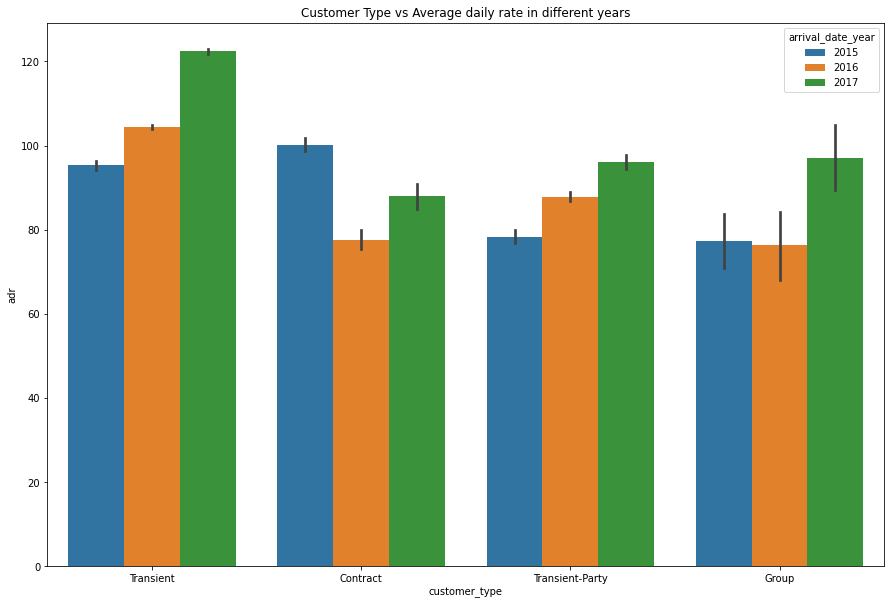

In [ ]:
plt.figure(figsize = (15,10))
sns.barplot(x= 'customer_type' ,y ='adr',hue ='arrival_date_year' ,data= hotelbookings)
plt.title('Customer Type vs Average daily rate in different years')

***Conclusion***

The Transient customer type has the maximum adr in the year 2017.The adr of Transient customer type increasing linearly in a progressive manner.Therefore we can predict from this data that the adr in 2018 for Transient customer type will be more compared to 2017.

The transient customer type is the customer type which generates the maximum adr compare to other customer type. Hence providing Transient customer type with good deals will be helpful for hotels to generate good revenue.

Similar to Transient customer type, the Transient-party customer type as well shows the same trend for upcoming years (adr increasing progressively).

The Group customer type has not shown any progressively trend in year 2016 than of year 2015 and the adr for 2016 remain nearly below the previous year.But the year 2017 had a huge influx of group customer type compare to previous years ,thereby shows a highe adr in 2017. The future trend of adr for group customer type we can predict from our bar plot that it will remain either nearly same as that of year 2017 or shows a little spike in adr from year 2017.

Hence the above Multivariable analysis really helps us to see the past trends of adr in different years and to plan effectively focusing on different customer type data to predict the future trends in the upcoming years

#8) Heat Correlation Map

Text(0.5, 1.0, 'Heat correlation map of hotel booking data')

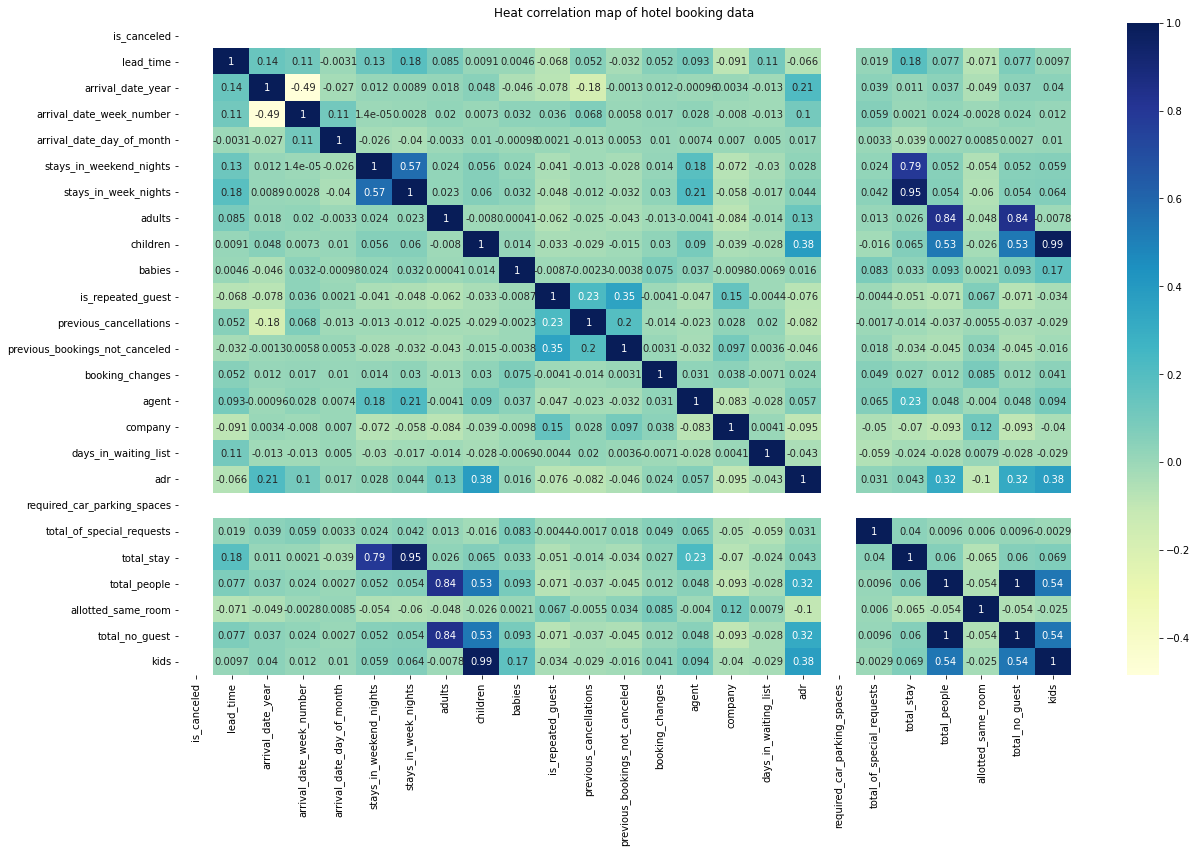

In [ ]:
df_correlation = new_hotelbookings.corr()
f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(df_correlation, cmap="YlGnBu", annot=True)
plt.title('Heat correlation map of hotel booking data')

***Conclusion***
The average daily rate is slightly correlated with total number of guest.Hence we can understand that when number of guest increases ,the average daily rate of hotel also increases with it. They are positively correlated to each other.
The average daily rate is negatively correlated with the number of special request.Hence we can understand that when the umber of special request increases the revenue of the hotel decreases.
The total number of days stay and lead time have slight positive correlation to each other. Thus we can say that higher number of days stay result in higher lead time.we can conclude by saying that the guest who plans to stay in hotel for longer duration always do the booking and planning of the trip very early.

# 9) Which hotel has high chance that its customer will return for another stay?

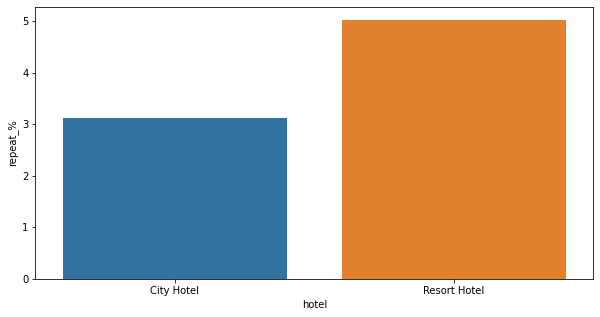

In [ ]:
repeated_data = hotelbookings[hotelbookings['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel')
D1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

# Counting total bookings
grouped_by_hotel = hotelbookings.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating repeat %
D3['repeat_%'] = round((D3['total_repeated_guests']/D3['total_bookings'])*100,2)

plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['repeat_%'])
plt.show()

Conclusion: Both hotels have very small percentage that customer will repeat, but Resort hotel has slightly higher repeat % than City Hotel.

#10) Which hotel has higher bookings cancellation rate.

In [ ]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = hotelbookings[hotelbookings['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = hotelbookings.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,16027,53261,30.09
Resort Hotel,7974,33952,23.49


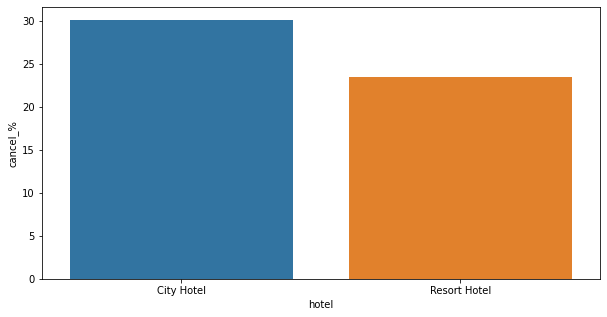

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()

Conclusion : Almost 30 % of City Hotel bookings got canceled.

# 11) When is the best time of year to book a hotel room ?

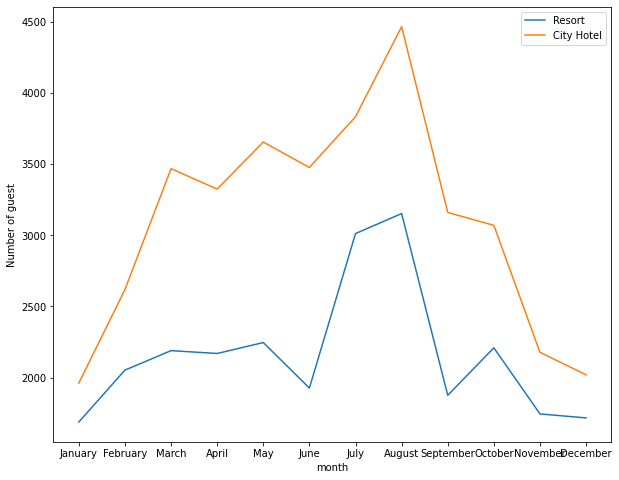

In [ ]:
#Which are the most busy months?
d_month = hotelbookings['arrival_date_month'].value_counts().reset_index()
d_month.columns=['months','Number of guests']
d_month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
d_month['months'] = pd.Categorical(d_month['months'], categories=months, ordered=True)
d_month.sort_values('months').reset_index()


data_resort = hotelbookings[(hotelbookings['hotel'] == 'Resort Hotel') & (hotelbookings['is_canceled'] == 0)]
data_city = hotelbookings[(hotelbookings['hotel'] == 'City Hotel') & (hotelbookings['is_canceled'] == 0)]

resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

resort_guest = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guest.columns=['month','no of guests']
resort_guest

city_guest = data_city['arrival_date_month'].value_counts().reset_index()
city_guest.columns=['month','no of guests']
city_guest

final_guest=resort_guest.merge(city_guest, on = 'month')
final_guest.columns=['month','no of guests in resort','no of guest in city hotel']
final_guest
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_guest['month'] = pd.Categorical(final_guest['month'], categories=months, ordered=True)
final_guest = final_guest.sort_values('month').reset_index()

#Which month get most visitors?
sns.lineplot(data=final_guest, x='month', y='no of guests in resort')
sns.lineplot(data=final_guest, x='month', y='no of guest in city hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('Number of guest')
fig = plt.gcf()
fig.set_size_inches(10,8)

Conclusion: Most number of guest comes in month of August.

# 12) Type of customers booking the most?

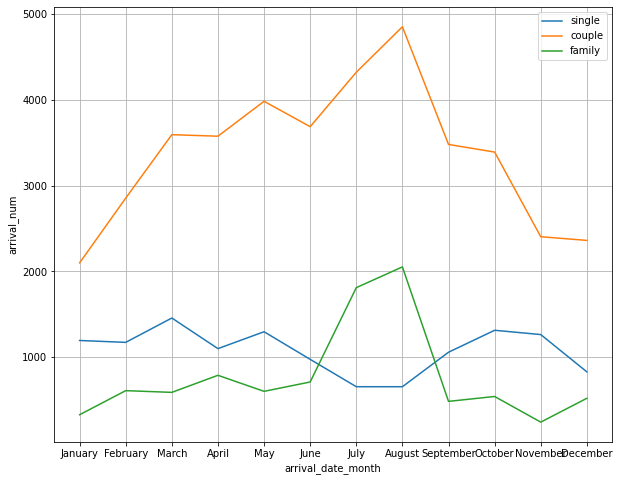

In [ ]:
## Select single, couple, multiple adults and family
not_canceled = hotelbookings[hotelbookings['is_canceled'] == 0]
single   = not_canceled[(not_canceled['adults']==1) & (not_canceled['children']==0) & (not_canceled['babies']==0)]
couple   = not_canceled[(not_canceled['adults']==2) & (not_canceled['children']==0) & (not_canceled['babies']==0)]
family   = not_canceled[not_canceled['adults'] + not_canceled['children'] + not_canceled['babies'] > 2]

reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']

fig, ax = plt.subplots(figsize=(10, 8))

for type in ['single', 'couple', 'family']:
  d1 = eval(type).groupby(['arrival_date_month']).size().reset_index().rename(columns = {0:'arrival_num'})
  d1['arrival_date_month'] = pd.Categorical(d1['arrival_date_month'],categories=reindex,ordered=True)
  sns.lineplot(data=d1, x= 'arrival_date_month', y='arrival_num', label=type, ax=ax)
  
plt.grid()
plt.show()

Conclusion: Moslty bookings are done by couples(although we are not sure that they are couple as data doesn't tell about that)

It is clear from graph that their is a sudden surge in arrival num of couples and family in months of July and August. So better plans can be planned accordingly at that time for these type of customers.

# 13) Countries from which most Guests are Coming?

In [ ]:
country_wise_guests = hotelbookings[hotelbookings['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,17572
1,GBR,8439
2,FRA,7086
3,ESP,5382
4,DEU,4332
...,...,...
161,ZMB,1
162,SYC,1
163,MDG,1
164,SMR,1


In [ ]:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

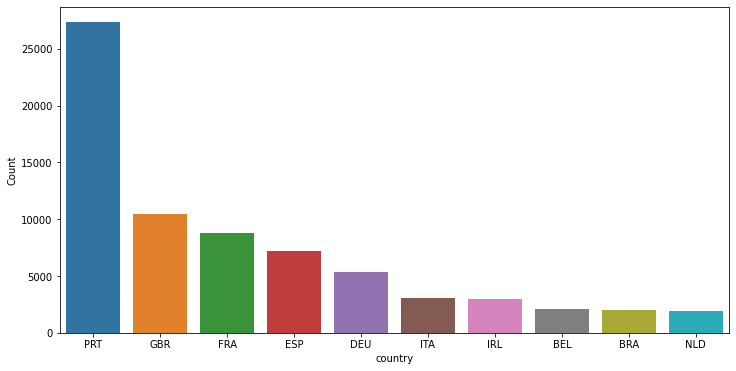

In [ ]:
country = hotelbookings.groupby('country')
d1 = pd.DataFrame(country.size()).reset_index().rename(columns = {0:'Count'}).sort_values('Count', ascending = False)[:10]
sns.barplot(x = d1['country'], y  = d1['Count'])
plt.show()

**From the Bar Chart above, it is concluded that most guest are from Portugal and other Europian contries.**

# 14) Which Hotel has longest waiting time??

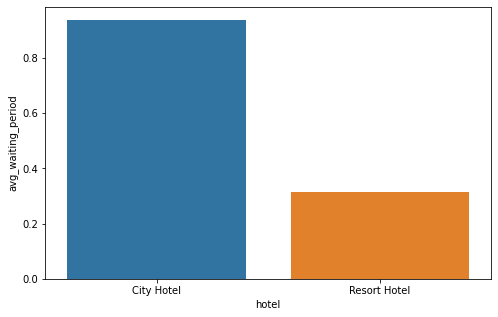

In [ ]:
grouped_by_hotel = hotelbookings.groupby('hotel')
d5 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = d5['hotel'], y = d5['avg_waiting_period'] )
plt.show()

City Hotel has more waiting time than Resort Hotel

# 15) Which distribution channel brings better revenue generating deals for hotels?

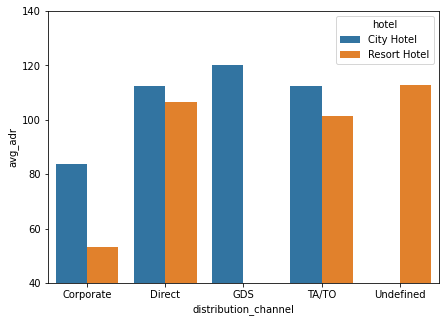

In [ ]:
group_by_dc_hotel = hotelbookings.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
plt.ylim(40,140)
plt.show()

GDS channel brings higher revenue generating deals for City hotel

Resort hotel has more revnue generating deals by direct and TA/TO channel

# 16) Which hotel has generated highest revenue.

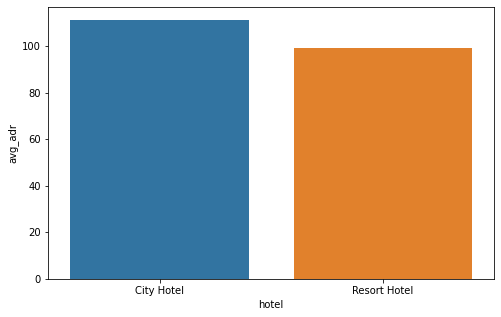

In [ ]:
d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = d3['hotel'], y = d3['avg_adr'] )
plt.show()

Almost 30 % of City Hotel bookings got canceled.